In [8]:
import pandas as pd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from scipy.stats import linregress


from pylab import cm
import matplotlib as mpl

import matplotlib.font_manager as fm
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2


In [9]:
def avg_loss_for_dataset(test,test_predictions):
    counter = 0
    summ = 0
    for item in test['Target']:
        loss = abs(item - test_predictions[counter])
        summ += loss 
        counter +=1
    avg_loss = summ/counter
    return avg_loss

In [10]:
dataframe = [[178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9449961339777262], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.7655844763775689], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 17.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 12.0, 0.9856656824567597], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 11.0, 0.9295089839241834], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9857914163119532], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8662112983444915], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 5.0, 0.9803755356060313], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 1.075979719886089], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9522581108191844], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9725473758280603], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 1.0435196299950866], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.8493513381210984], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9607185615233873], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.8896020444911623], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9321786675834544], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7567812276491246], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.754588346552839], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 2.0, 0.9308470427630922], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9416427789871615], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 3.0, 1.0168171776826194], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 9.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 4.0, 0.8608398959800989], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0140199435478858], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 5.0, 0.9259897651251748], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9609398719273478], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 4.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8118848109531628], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.7341977853244742], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9250254908348258], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9115464729194042], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7659316287918432], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9772804571570066], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 5.0, 0.9612790397994581], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8780807005589211], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9676432244445068], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 1.002124513397536], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.9171052766444895], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.9072188170193636], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9333649494401359], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9735518249560708], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8498348264641424], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9785941273124635], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9492060856618518], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.84644745188234], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9903383189055543], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 12.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.96404200698098], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9572512770943125], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9519361572574261], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 7.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 3.0, 1.0015211250334293], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 2.0, 0.9987422810661001], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 1.028782763053749], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.9613804673491357], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 11.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9144226407415997], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9402022399181693], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.8985520327857968], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8342819049016509], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 1.0384770344473537], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 0.9149816366080951], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9203722615481476], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 3.0, 0.8580013130943392], [101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684.0, 4.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 11.0, 0.9515147672611448], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9648745939967791], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8625202092826595], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0140199435478858], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 9.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 13.0, 0.8455029963835033], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9367041021979322], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.9411650617564296], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 0.9483261815144912], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 10.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 17.0, 0.8584525829135976], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.7944017582211862], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 5.0, 0.9121253532023478], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.6895213850403568], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9699772147938979], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 0.8845755472923243], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9562270299072007], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9907842631091053], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.986910583677853], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 3.0, 0.9670007634238902], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 0.9960566557791478], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 7.0, 0.9789571629181882], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9646657856011368], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9186222183209989], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 4.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 21.0, 0.9397752474291902], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 0.9501952287608727], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9465145727898701], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9538888265396247], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9399572044123382], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9762610754737259], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533.0, 2.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9636389019912588], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8936754454289133], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9322136894188711], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 1.001539294998512], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8069992312597599], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9800726259942082], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.0458731203839482], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8780807005589211], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 16.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 0.9875369821829152], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.95853787219853], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 8.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 5.0, 0.9569617658885023], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8781438582382524], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.9998717733490312], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 2.0, 180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 1.0, 0.9848848687652624], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 2.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9772913945344945], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9625227039627464], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 6.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.99381998534264], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 0.9685250460992347], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.8382980148764576], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8345674349091394], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9174419643291052], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.891700347351], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.8619160697324452], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9174419643291052], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 5.0, 1.0054332235562138], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.7777600032626379], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 0.9565203988809606], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 3.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 20.0, 0.8900602946829917], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.8580291198826849], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 4.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 0.7747453157772588], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 4.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9571104940540256], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9022576984051939], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 3.0, 0.9854720361915544], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 2.0, 0.7838508196483013], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.963043215497725], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 0.9791900180432985], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.9146762085458764], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.9067004135090354], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 0.8391982083057529], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9049519470772374], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.9598545021893219], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9784839719568561], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 3.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 4.0, 0.9123128071621511], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.9515255493089412], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 11.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9740284887462832], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.8488947655015798], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9566042028404603], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9153958431932675], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9263764101797112], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 6.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 7.0, 0.8930435512781771], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 1.0359052089351592], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8787469492017881], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 8.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 5.0, 0.9610827989629377], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 13.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 57.0, 0.9493774335981242], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.818182848933827], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9413960538785519], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9358030112811634], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9901010328635635], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 7.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 8.0, 0.9339816195463584], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.895460455450076], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9907992020881737], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9520620515662654], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9319421991224651], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 13.0, 0.9781006934960296], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9498162551981643], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 40.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 21.0, 0.9662824174942474], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9435706780141093], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 11.0, 0.9407397765025803], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 11.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 2.0, 0.9390847250753844], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 1.006439407109603], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 4.0, 0.9116825294386167], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9640211607170793], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9587912971744194], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 0.9304992621752822], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 4.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 5.0, 0.9137705857038638], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 1.1056787947201825], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9582686482890015], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.979055396853547], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8575142830063616], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9115617173573373], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 12.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9881912253708267], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 2.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.967762137347678], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 1.0, 0.9591785734539189], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 3.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 5.0, 0.913461011252937], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 0.9336651899244564], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 3.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 5.0, 0.8467054935937607], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 1.0098438155169596], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 7.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 5.0, 0.9387792002462922], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9352835193681039], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.996111708196437], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.8779296621911273], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.8545508201122887], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 0.9128618328637931], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 0.9468537169771962], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9801826467090207], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.8701547644255772], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8513040535491408], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0141239080899644], [101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9227002969229261], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 0.9611116033414553], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.8448026096368219], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9625175983036727], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 2.0, 0.9093134427927778], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 0.9190468453924168], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9659098956208374], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9328738889532544], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9450989662775013], [174.96681, 3675.0, 9.841, 1925.0, 71, 33.4, 1.27, 603.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8861599830639705], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 7.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9565989933051938], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9449601316548712], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 1.1398452605117753], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9371922440989444], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.7817799717866493], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0183789708316853], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.8496639638709921], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 10.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 1.0811844092341816], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 0.9390105953922283], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.970707705674362], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9578781950113964], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 9.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9535759353440058], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9959474899890072], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9049413560312074], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 5.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 8.0, 0.926422051290347], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.8808316972040083], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9624585003776857], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8532777396099585], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 7.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 0.8592048237394283], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9520731328268275], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 0.9610886997521843], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 4.0, 0.9603128207670497], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 8.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 1.0182315545586822], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 5.0, 0.8462436965483924], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.801496483012595], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 3.0, 0.9863056837296592], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8192250894478357], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9869222390599498], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9166661994942711], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 2.0, 0.9162946402550339], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8887748526111445], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 3.0, 0.9572725599802271], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 7.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 44.0, 0.9582104035641719], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.7515176988267706], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9387731527793101], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 4.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9747430218242296], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 0.9491756236102988], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0111999056886398], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.9107719460557979], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 7.0, 0.9798243228409339], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 5.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9396844957093555], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9288655023830708], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9415326740466513], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9358030112811634], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9367340323371962], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9577579449303398], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 3.0, 1.094162126552438], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.936731598004665], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9901010328635635], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 5.0, 0.9685250460992347], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9093004939526448], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.8298744423844664], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502.0, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8962755636656873], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9721612197662035], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9545871055908242], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8401516004087005], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 1.0086177857775576], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 3.0, 0.9726200235624743], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 5.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 4.0, 0.9600088905185206], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8715572383750786], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9628155112349006], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 8.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 41.0, 0.974120319666948], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9648745939967791], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9676432244445068], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.9444488742077318], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9131127604709505], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.9588907514607746], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9399572044123382], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8410887334060297], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9720447819145323], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9112871252529098], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 13.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.949610697602134], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 11.0, 0.944271146310732], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9051811440705901], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9210962134475512], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 0.9644817675506485], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 3.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 1.0, 1.4360388027647837], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 7.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.8975569007132539], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9442422267074597], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.8614391907998775], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.8955345450848808], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.7802564044389189], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.913103021043414], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 0.9496904084445645], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 2.0, 0.9619182705487413], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8457491169913083], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9955673041496376], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8062489316469894], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.9704989630720218], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.885535176325294], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 7.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.9428397832912678], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.8298744423844664], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.7986724906284741], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9649530712412919], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 4.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9313038983097842], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9690584381781161], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9733351282461997], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 3.0, 0.9667638784030733], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8762223385922332], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9358030112811634], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8440030255855967], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8735057676116866], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 2.0, 0.9743257280902838], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 7.0, 0.9929828593831027], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9379118423828436], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 0.9632094420613393], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 7.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8610228499015737], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.7916424355290244], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.963958347183391], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.8988067115020233], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 7.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.890107471511292], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9442877002717419], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8787469492017881], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 5.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.8996578156422838], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9580554049857192], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.8502653039661511], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 0.9373865345496419], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 1.0497907620541944], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.0150584619323666], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 1.0531051935224789], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9373634638202083], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 4.0, 0.968206267844673], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 2.0, 0.9545173458610796], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 0.9968541881605468], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.8117620354781848], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9950613601841912], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9817410194900171], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9772734772411458], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9297452747106553], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 0.8864584027763442], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 1.0352646839308008], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8916194065437723], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.684839890966841], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534.0, 5.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.8836179239080119], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9918913658332471], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8864251167567604], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 5.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 24.0, 0.998387042348518], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8898293325195794], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.916757368223585], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 1.0413188111024754], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8062489316469894], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.922870666547765], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 2.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 0.9133502464300653], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 4.0, 0.9501747987253403], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 2.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 27.0, 0.9294664834787736], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 2.0, 0.9599212572823463], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9798735631474911], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.8990575670743565], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9223645669378217], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.151879803188118], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9399949068347339], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 5.0, 0.8526866404800155], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 3.0, 0.9059989635623857], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 5.0, 0.9274740112696378], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 7.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.789646763730196], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9005631564042714], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8796464772866477], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 28.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 11.0, 0.9497850765430624], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 23.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 36.0, 0.8920495160157113], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 6.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.854223224134089], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9373655177835533], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 3.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 5.0, 0.913461011252937], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 0.9215980054527929], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 31.0, 0.9758221330649693], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 5.0, 0.9604102556680726], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.013060446832674], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 6.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 1.0, 0.9749627103026108], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9379372058329398], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.013060446832674], [186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9854738861458578], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 3.0, 0.9899799687134505], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9861502339594284], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9225990377908112], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.8964686933369594], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 5.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 6.0, 0.9809735444467883], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9520636549864568], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8287103578010822], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9402458063980987], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9685148167635933], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9326911855704754], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.978898099881853], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 5.0, 0.9535932414190372], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8401516004087005], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9265332486957226], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.7796400109779873], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 11.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9498982516991603], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.843485844431944], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.7997941567609786], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8448889777817207], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 10.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 1.0811844092341816], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 3.0, 0.9696643596909216], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 3.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 7.0, 0.9507659076854034], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 2.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 1.216976987740236], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 1.116062984791177], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 5.0, 0.9535932414190372], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 1.0362636989513698], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9628419697853753], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 0.9343981545355307], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.9856046952456448], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.839662781581722], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.909097946989842], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9918913658332471], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 13.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9825410710668062], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9762789738913068], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9416331184419057], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9540141274969536], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 1.0216397936614041], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 1.0260509590273312], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 3.0, 0.9888807936143355], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9197151799261617], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.7718942494072862], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8790886889661148], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 7.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9425056991739538], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9145416146877065], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9371774494645232], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.064922789354152], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 1.0084695826072265], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 3.0, 0.8245287631574393], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.9863381070448568], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8732957912316973], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 4.0, 0.8791169439399784], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 3.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 4.0, 0.8282903213779292], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 0.9960573113454079], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8502136216585536], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8322788921920661], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9049519470772374], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.829947584947208], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 5.0, 0.9007062484965606], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.7839989814192704], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.8818314327364867], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9580033001597102], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.818572868399328], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9638982891513245], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8333346440651147], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9794884379875174], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 5.0, 0.9383143507489492], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.9478785048127261], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 5.0, 0.7961866430509895], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 7.0, 0.9025020911910371], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 28.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 1.0152622416919563], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 3.0, 0.9785057905899774], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 5.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 0.9619469732907798], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 3.0, 1.1144565839241776], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 1.0079974815597506], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9882838581717904], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9851064824166574], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 3.0, 1.0105460515878335], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 6.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9769767252056689], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.7959443412809796], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9959474899890072], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.9070416692357152], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9612579671540634], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534.0, 2.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.9032114081476748], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8253408494884106], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 103.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 20.0, 0.8466246299558645], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 2.0, 0.9537957893060476], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 24.0, 0.9769567793158777], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8821928765443671], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 5.0, 0.9184115637497363], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.826715112062164], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 21.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 25.0, 0.9656332843832031], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.912923487668012], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9522893183378299], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 1.0174884788873768], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7659316287918432], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.997151823501964], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 7.0, 0.882330149768149], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 0.8841581286958387], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9163873910415522], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 3.0, 0.9621261388511667], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9221670550128787], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9740146669035351], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9333675808538943], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.7984557970868524], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 1.0, 0.9323018401754842], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9508093003137702], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9228078436680647], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.8579975932677625], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9252445016943094], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9889676591390925], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 0.957601902646259], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 2.0, 0.9802755104930597], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8998563236046594], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8787469492017881], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8898293325195794], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9326163445281415], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.979055396853547], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9808995745881663], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9708584032578065], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 3.0, 0.9952957333522544], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 11.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.941528624642722], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.7799046024309041], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9917594506924401], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 2.0, 0.9769531531681568], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 0.9336651899244564], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7295569372719611], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 13.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 4.0, 0.9249245386195942], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 2.0, 0.9701258279330012], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 1.0, 0.9709431083586674], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9435706780141093], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9831340663136005], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.8973585974428582], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.8596751440557262], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8715572383750786], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9145416146877065], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 1.0420950730345842], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9198203049336399], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 3.0, 1.094162126552438], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 2.0, 0.9355986448760304], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9465752500880268], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9983415586301363], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 2.0, 0.9401552422754418], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9850449122462767], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 11.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 4.0, 0.9688918434829684], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9768136635424963], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9569823876951687], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 1.038182973344686], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 10.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 11.0, 0.8349861104994442], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9692880456357634], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 5.0, 0.7585494747504665], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.8985520327857968], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9450989662775013], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.826715112062164], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 4.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 1.0183151338037493], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9662736936300589], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9528392980188942], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9670311737266996], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.7878535450680166], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 3.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 0.954523092861976], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9857914163119532], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9070120512482155], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 2.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9772913945344945], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8377723267409677], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.8938232927241171], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 1.0158265267003876], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9825238900240612], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 13.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9954450040718698], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600, 1.0, 1.0173695166309942], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502.0, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.8624851266341097], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9131457507023927], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.963043215497725], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9210131114287203], [6.94, 1603.0, 0.534, 453.65, 3, 59.6326, 0.98, 520.0, 1.0, 9.01218315, 2742.0, 1.85, 1560.0, 4, -48.0, 1.57, 899, 1.0, 1.0399545548507365], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9921589992881066], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.945432439268799], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 1.0468893433931044], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 0.9156363915990792], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9716818312889153], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573.0, 5.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.904598809273606], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 8.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 5.0, 0.9872659305709622], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.913103021043414], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7295569372719611], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9962407769017356], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.960449490976747], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 174.96681, 3675.0, 9.841, 1925.0, 71, 33.4, 1.27, 603, 1.0, 0.9688412263357805], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 2.0, 1.3626290297471177], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8062489316469894], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.9545761480053209], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 1.0162799880897662], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9871018088471392], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 13.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 9.0, 0.8894890535709077], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9433895706661853], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 13.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 58.0, 0.8659721057075832], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 4.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.919758727387113], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9466794418882931], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9819964416231696], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.8938232927241171], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.944151645957741], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 10.0, 1.0097931795170767], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 22.0, 0.9807457736634361], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 4.0, 138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502, 5.0, 0.9113757498489978], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 10.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 1.0811844092341816], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 0.9677673124890747], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.758328618710093], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9076402558415054], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9363679477598069], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9983415586301363], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9405767271800326], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 1.0819708913625952], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8074905468256656], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9434163949992881], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 28.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 11.0, 0.9495866960151707], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9326163445281415], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8660708287091876], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 1.0, 0.9804854838337952], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9367728634064646], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9017985327065885], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 13.0, 0.9654823627528792], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.996111708196437], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9876352798028094], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.8805613283867195], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 17.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 3.0, 0.944546285689305], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 2.0, 0.8597725046487815], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9725093641535728], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 11.0, 0.9392005602693027], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9437237336633709], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9597260014768717], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9954231758632097], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 5.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.8818905538824271], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9770249398140535], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9675462737656046], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 2.0, 0.9636748583829043], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9689396220852798], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 5.0, 0.9049863673830641], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 4.0, 0.9701564203005355], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 0.9127269086943391], [186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770.0, 24.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 5.0, 0.9758227570217545], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 8.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 21.0, 0.9113133197020159], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9207180619722958], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9315988089263744], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 7.0, 180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658, 6.0, 0.9876793456982038], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9221406301901857], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 4.0, 150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 5.0, 0.9187982583486889], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9872466475304638], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.956998177309411], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 2.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 3.0, 0.9983789000293244], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 7.0, 0.8823282348691198], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9920269814826824], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 8.0, 0.9545761342315539], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9706588819676364], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9628419697853753], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 6.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 23.0, 0.911057221532266], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 1.6165344617111905], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 0.9793250632223796], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8460519393832382], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8787469492017881], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.0145900614005416], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 0.8318620466150488], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 1.0702565321081634], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 16.0, 0.9413810750135247], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 21.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 25.0, 0.9595054720797258], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.8072704660328386], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 0.9537644987892439], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 10.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9457373952748871], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 9.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 0.9809332437437513], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9850449122462767], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 1.0175419900412428], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 1.0, 0.9790984047425175], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.818572868399328], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 0.9626888384478441], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9130474266184775], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.971810659611803], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.934033939427893], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9946505402665572], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9921313931735495], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9419451002057073], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 7.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 3.0, 0.9570851296037363], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9924948154821409], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 27.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 85.0, 0.9006210634166871], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 8.0, 0.9124627288234378], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9731723283802122], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 7.0, 0.8768686867083441], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 0.8952265820169414], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9449961339777262], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9358030112811634], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9735409219842899], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 5.0, 0.9751551205326505], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9656653002773309], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9119112161379435], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 3.0, 0.8742569455434276], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9061944146727804], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9661344472788708], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.976003681145104], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 9.0, 0.9396080280541084], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9382534721400325], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9722533243912687], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 3.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 0.8913239145514087], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9753133868458667], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 0.9729310498477617], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.9515255493089412], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.8696598677640193], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.8268562237806302], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 5.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 24.0, 0.9762381326471739], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9901010328635635], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 8.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 21.0, 0.8929481781185384], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9704268690067115], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9316979549907575], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9860616306004938], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 13.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9586258839505081], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9946505402665572], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 3.0, 1.020174611786824], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 0.8841581286958387], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 13.0, 0.9774021197514814], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9676432244445068], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 1.0065245919006283], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.8903525025723], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.956998177309411], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.9924948154821409], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9670311737266996], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9661447790996804], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9352835193681039], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 174.96681, 3675.0, 9.841, 1925.0, 71, 33.4, 1.27, 603, 1.0, 0.9661113686095869], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9449451240938147], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 2.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 1.0, 0.9782473056114986], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9342016233169929], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9690584381781161], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9384510782471627], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 3.0, 0.9606445954310463], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9501191231641536], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9487270934832177], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 4.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9289890158120389], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9650432913804194], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9374852706106803], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.88419993081402], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9544428199404879], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 9.0, 0.9302172342328388], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9415327690800518], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9430663707473385], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9626084315567619], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 13.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.7968013176227907], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8883088025797259], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 3.0, 0.841155704913394], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9014846431782995], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 9.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 13.0, 0.9666653121663149], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 1.0, 0.9213110575027564], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 19.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 0.9750135827220449], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 2.0, 0.9700572945688266], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9356811716914293], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 9.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 11.0, 0.8267135754253292], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.969060212021027], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 1.1551063147731697], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 0.9544893406355848], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9712053682343851], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 3.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.8846379566404724], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 13.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 57.0, 0.9426900194699525], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652, 2.0, 1.0077074029256232], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7567812276491246], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9550186338953892], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.9006808240525023], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9727532082963615], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9165917734988536], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 1.0, 0.8980782006484305], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9551651655654244], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9683739286914057], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 1.0555811907154555], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 4.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 1.0511625411540788], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.8758970461425827], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9352835193681039], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 9.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9593955870294784], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 7.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 8.0, 0.9733988910354725], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9209828490190581], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.0244670466346997], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 2.0, 0.9115617173573373], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9475435530055336], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.996111708196437], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9633813813613117], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9093004939526448], [164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573.0, 5.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.904598809273606], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9283440329215756], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533, 5.0, 0.9260881771753952], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9230630484368247], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 2.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9946079143599114], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.986910583677853], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 0.9718738620163633], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.9854443344378825], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.8102530840717138], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.9148657388485244], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9860616306004938], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.7659316287918432], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9849359660792711], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.914844259828647], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9316979549907575], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 10.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 7.0, 1.0004049386740475], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9885893925042853], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 1.0107548784966354], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9810677817326325], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 9.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 4.0, 0.9389714404815314], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 9.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 0.949502368026246], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.8818688461891834], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 0.8405349665160097], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9689254838495044], [101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9197070668324422], [58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9351955446632487], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9784839719568561], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 3.0, 0.938688520708237], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 4.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.9681295827105894], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 0.9602648026075498], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9918913658332471], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 2.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 5.0, 1.2834866479924754], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9612610715055834], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7478700302091346], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.8619160697324452], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 3.0, 0.8352979692783143], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9328308359194178], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906, 2.0, 0.9512559287534532], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9119112161379435], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 4.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 11.0, 0.913442753269929], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.8397687702040204], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 7.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 10.0, 0.9236864243366458], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 11.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9184495732779276], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 13.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 57.0, 0.9309635590490668], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 2.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9243621704496547], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9231126008804343], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8613940282996246], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 1.0316029773781656], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.8728673775162018], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 12.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9942169493601744], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9035111737960367], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 5.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9305025017643278], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9973478467452774], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9160610571732286], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.782189956373022], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 4.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 23.0, 0.9638972631173081], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565.0, 5.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9288414264526714], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9346523721447983], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 5.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 24.0, 0.9916535434703301], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 4.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9101365167164076], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.980461947963068], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 2.0, 0.8940472422342708], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9574928085457985], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 6.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 23.0, 0.94807399546917], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9762242595547872], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.7850472879371398], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9094403712208698], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 9.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 1.0068158537677825], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 3.0, 0.982634423747133], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9450404227637665], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 2.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9930986855218426], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 5.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 19.0, 0.8382336159975616], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 6.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 29.0, 0.9952972818976662], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9218533537344316], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 1.130391771733237], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9705922752606267], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804, 2.0, 0.9879903741164039], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9767646651131067], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9799817086153022], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9538239248045871], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.8995550958276546], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 31.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 9.0, 1.1810316108636063], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 6.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 7.0, 1.0059230964664572], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 8.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 21.0, 0.9060547763300723], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9758841974569115], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.7839989814192704], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 4.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 5.0, 0.8900067516904364], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 0.9850449122462767], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 0.8193666344038036], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 5.0, 0.8313913923562058], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.9751445996666149], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 2.0, 0.9142962866886408], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 7.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 10.0, 0.9236864243366458], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 1.0, 0.9338975418028812], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9566042028404603], [54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.0173527827002782], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 5.0, 0.9096211052717125], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9817410194900171], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9628758104244144], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 8.0, 0.9770394886571018], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9174419643291052], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 8.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 5.0, 0.9705292932520045], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9218533537344316], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 4.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9812022333854483], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 8.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 27.0, 0.9883157161751794], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8432270062765991], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.9542184588683544], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 6.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 5.0, 0.9761912807446105], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 4.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 25.0, 1.0217891554254035], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7982630274057823], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 2.0, 1.028782763053749], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 5.0, 0.8688668779997489], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9166661994942711], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 54.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 17.0, 0.9667259984052301], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9367728634064646], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.917344286753339], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8642972234585593], [102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8245047604923201], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 4.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.81427330821122], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 5.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9158396229109622], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 22.0, 0.9593926262430641], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 13.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9588573609840623], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.7774673991295751], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9426896855667337], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 1.0074712247358144], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9630553519719652], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 12.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 7.0, 0.8065790074705776], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8573708138552383], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.924821066401627], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9195999896325184], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.8259328498428119], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9768136635424963], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 3.0, 0.9820958975002085], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 0.8739350220354948], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565.0, 5.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.9045560197169872], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 11.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 2.0, 0.9477652009239117], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 5.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.7539382604872334], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 1.0066965476285814], [138.905477, 3737.0, 6.162, 1193.0, 57, 53.0, 1.1, 502.0, 5.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.8833038381303667], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652, 1.0, 1.0251833876966046], [101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.938769547707978], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 4.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 9.0, 0.9478097209642834], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9794850147416453], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 2.0, 0.8714764512781437], [150.362, 2173.0, 7.52, 1345.0, 62, 15.63, 1.17, 533.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.944151645957741], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9203722615481476], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9496002267543703], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.0825042779781802], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9449601316548712], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 2.0, 174.96681, 3675.0, 9.841, 1925.0, 71, 33.4, 1.27, 603, 1.0, 0.9752710539291353], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 8.0, 0.905939469894009], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 2.0, 0.8802372677994056], [112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.917344286753339], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9773715538434925], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.7982630274057823], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 0.9632094420613393], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9554442489457932], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 3.0, 0.9785057905899774], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 10.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 0.9684913689896804], [69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.917581860674499], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 3.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 20.0, 0.9061762508607578], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9476289248366773], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 44.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 7.0, 0.9781707795406533], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.7871308295953006], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 13.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 1.0, 0.9850538264405255], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.9397154698735418], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9600649428930443], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 6.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.9561041082380445], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8570393931884658], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.997151823501964], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 3.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8686807471993915], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 4.0, 0.8705706567209243], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.9539682479492101], [140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534.0, 4.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 3.0, 0.8671090632281394], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9554442489457932], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9453586344130426], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9586659033651407], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 140.907662, 3403.0, 6.77, 1208.0, 59, 93.0, 1.13, 534, 3.0, 0.9719651615166895], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9683739286914057], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9593157219034332], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 1.005812989646539], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 1.0, 1.0065245919006283], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 3.0, 0.9894264780806554], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 0.9338222408408204], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 2.0, 0.8796464772866477], [40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9367340323371962], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 2.0, 0.9620590561333696], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 3.0, 0.8422056921180663], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9630553519719652], [44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633.0, 11.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 4.0, 0.9553552419296785], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 1.0, 0.9768099073713794], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 1.0, 0.9394376051618707], [95.951, 4912.0, 10.28, 2896.0, 42, 72.1, 2.16, 652.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 2.0, 1.0003969979859164], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.9080917211107027], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 1.0, 92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640, 3.0, 0.992080138327479], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 4.0, 0.9263491569074487], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.708363042675787], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565.0, 1.0, 208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715, 1.0, 0.8637684197654859], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 2.0, 151.9641, 1802.0, 5.264, 1099.0, 63, 11.2, 1.2, 544, 1.0, 1.216976987740236], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 2.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9640934842770229], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 7.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 3.0, 0.7918191315531401], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 1.0, 0.9077043192747101], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 2.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9762789738913068], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 20.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 31.0, 0.8915832593091815], [186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770.0, 2.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9629554214733336], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 21.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 11.0, 0.9123379349805232], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 22.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 1.0, 0.9863299408061397], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 2.0, 0.7932984383056427], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 13.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 4.0, 0.9376164842955117], [232.03774, 5061.0, 11.724, 2023.0, 90, 112.72, 1.3, 703.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9804622017235191], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 11.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 4.0, 0.961013744047607], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9670311737266996], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9389413061212153], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 12.0, 186.2071, 5869.0, 21.02, 3459.0, 75, 5.8273, 1.9, 770, 1.0, 0.9842105353577736], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9333649494401359], [195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880.0, 2.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.684839890966841], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.9715464057361436], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 0.8775671815756394], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523, 2.0, 0.9347024568597438], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.8355330919074029], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 1.0510692086666182], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 44.9559085, 3109.0, 2.985, 1814.0, 21, 18.0, 1.36, 633, 1.0, 0.9498296698649377], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 3.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 1.0, 0.9866362307798493], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762, 2.0, 0.9827881535525081], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.8777660068817122], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 1.0, 0.9363679477598069], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 2.0, 0.9243170990131996], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 3.0, 0.9376911317765394], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9749978419812019], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 157.253, 3273.0, 7.9, 1585.0, 64, 13.22, 1.2, 547, 1.0, 0.9335545638090281], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9630553519719652], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 2.0, 0.9750620401589136], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565.0, 1.0, 207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589, 3.0, 0.9462889444496871], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.8832899326972202], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 3.0, 0.9252445016943094], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 5.0, 0.8883592682003789], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.8464258265609097], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.8102530840717138], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.9034177050732164], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 2.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.8106538677803318], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 3.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9983415586301363], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.961801894876412], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 4.0, 0.974139959642575], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 3.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 1.0, 0.9604673713378235], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 164.930332, 2873.0, 8.79, 1734.0, 67, 32.61, 1.23, 573, 1.0, 0.9489650762205994], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 3.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 1.0, 0.9320397992252155], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 49.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 29.0, 0.8039580778576232], [200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 1.0420950730345842], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 2.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 1.0131913942976458], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 5.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 3.0, 0.9052341274018662], [65.382, 1180.0, 7.14, 692.68, 30, -58.0, 1.65, 906.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9405767271800326], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9320458773319055], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 144.2423, 3347.0, 7.01, 1297.0, 60, 184.87, 1.14, 527, 1.0, 0.9138735502118177], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 11.0, 0.9535466393799337], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9331357084567719], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 1.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 2.0, 0.9039151618203544], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 5.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 4.0, 0.9537890429466835], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 2.0, 0.8318620466150488], [192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840.0, 2.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 9.0, 0.9396080280541084], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 5.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 3.0, 0.8997196420973088], [101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684.0, 1.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 3.0, 0.9264987503548224], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 11.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 7.0, 0.9383369092057712], [208.980401, 1837.0, 9.78, 544.7, 83, 90.924, 2.02, 715.0, 1.0, 140.1161, 3716.0, 6.77, 1068.0, 58, 55.0, 1.12, 538, 1.0, 0.8841581286958387], [162.5001, 2840.0, 8.54, 1680.0, 66, 33.96, 1.22, 565.0, 1.0, 204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007, 1.0, 0.9476149979291577], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 6.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 7.0, 1.0957032659775972], [85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762.0, 15.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 16.0, 0.8496303329253139], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 2.0, 0.9735518249560708], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 4.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 1.0, 0.9698499687708262], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 1.0, 0.9668333552615269], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 1.0, 167.2593, 3141.0, 9.066, 1802.0, 68, 30.1, 1.24, 581, 1.0, 0.9537644987892439], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 9.0, 87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403, 5.0, 0.9635430231160158], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 5.0, 1.0040979681783138], [204.38, 1746.0, 11.85, 577.0, 81, 36.4, 1.62, 1007.0, 3.0, 173.0451, 1469.0, 6.9, 1097.0, 70, -1.93, 1.1, 596, 8.0, 0.9471945394615212], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 21.0, 54.9380443, 2334.0, 7.21, 1519.0, 25, -50.0, 1.55, 717, 25.0, 0.9643701790321695], [51.99616, 2944.0, 7.19, 2180.0, 24, 65.21, 1.66, 652.0, 3.0, 190.233, 5285.0, 22.59, 3306.0, 76, 103.99, 2.2, 760, 1.0, 1.006111972647663], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 1.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 3.0, 0.9457424648323219], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867, 1.0, 0.8117620354781848], [47.8671, 3560.0, 4.506, 1941.0, 22, 7.289, 1.54, 658.0, 1.0, 200.5923, 629.88, 13.534, 234.321, 80, -48.0, 2.0, 890, 1.0, 0.9984251879981709], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 1.0, 0.8102530840717138], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 9.0, 102.905502, 3968.0, 12.41, 2237.0, 45, 110.27, 2.28, 710, 2.0, 0.9271280087920659], [92.906372, 5017.0, 8.57, 2750.0, 41, 88.516, 1.6, 640.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.896596118795363], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 1.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 2.0, 0.8952583285289736], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 7.0, 0.8973585974428582], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 2.0, 26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577, 3.0, 0.9705215465947156], [58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737.0, 5.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 1.0, 0.9601601783608642], [106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719.0, 3.0, 69.7231, 2673.0, 5.91, 302.9146, 31, 41.0, 1.81, 578, 7.0, 0.9018934405482583], [87.621, 1650.0, 2.64, 1050.0, 38, 5.023, 0.95, 403.0, 5.0, 112.4144, 1040.0, 8.65, 594.22, 48, -68.0, 1.69, 731, 3.0, 0.9473936680967808], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 106.421, 3236.0, 12.023, 1828.05, 46, 54.24, 2.2, 719, 3.0, 0.8779296621911273], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 2.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 1.0, 0.8573708138552383], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 0.8751095923580828], [132.905451966, 944.0, 1.93, 301.7, 55, 45.505, 0.79, 708.0, 2.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 1.0, 1.026977125904172], [178.492, 4876.0, 13.31, 2506.0, 72, 17.18, 1.3, 523.0, 1.0, 196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870, 3.0, 0.8701542727753754], [55.8452, 3134.0, 7.874, 1811.0, 26, 14.785, 1.83, 762.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 1.0, 0.9779589785713233], [63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745.0, 6.0, 118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558, 5.0, 0.993604640637135], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 9.0, 192.2173, 4403.0, 22.56, 2719.0, 77, 150.94, 2.2, 840, 2.0, 0.9264672541012028], [207.21, 2022.0, 11.34, 600.61, 82, 34.4204, 1.87, 589.0, 3.0, 168.934222, 2223.0, 9.32, 1818.0, 69, 99.0, 1.25, 589, 1.0, 0.9585917054643256], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 1.0, 0.8902283387268375], [26.98153857, 2743.0, 2.7, 933.47, 13, 41.762, 1.61, 577.0, 14.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 13.0, 0.9640326699114944], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 63.5463, 2835.0, 8.96, 1357.77, 29, 119.235, 1.9, 745, 1.0, 0.9798735631474911], [107.86822, 2435.0, 10.49, 1234.93, 47, 125.862, 1.93, 804.0, 3.0, 40.0784, 1757.0, 1.55, 1115.0, 20, 2.37, 1.0, 589, 5.0, 0.9310472352770192], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 3.0, 0.9542184588683544], [180.947882, 5731.0, 16.69, 3290.0, 73, 31.0, 1.5, 658.0, 1.0, 195.0849, 4098.0, 21.45, 2041.4, 78, 205.041, 2.28, 880, 3.0, 0.8069992312597599], [196.9665695, 3243.0, 19.3, 1337.33, 79, 222.747, 2.54, 870.0, 5.0, 85.46783, 961.0, 1.532, 312.45, 37, 46.884, 0.82, 762, 1.0, 0.8488969782663918], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 2.0, 58.9331944, 3200.0, 8.9, 1768.0, 27, 63.898, 1.88, 760, 1.0, 0.9699772147938979], [114.8181, 2345.0, 7.31, 429.7485, 49, 37.043, 1.78, 867.0, 1.0, 58.69344, 3003.0, 8.908, 1728.0, 28, 111.65, 1.91, 737, 3.0, 0.9772804571570066], [118.7107, 2875.0, 7.365, 505.08, 50, 107.2984, 1.96, 558.0, 1.0, 137.3277, 2118.0, 3.51, 1000.0, 56, 13.954, 0.89, 375, 2.0, 0.8907250325338332], [91.2242, 4650.0, 6.52, 2128.0, 40, 41.806, 1.33, 600.0, 1.0, 101.072, 4423.0, 12.45, 2607.0, 44, 100.96, 2.2, 684, 2.0, 0.9434974429610172]]

In [11]:
dff = pd.DataFrame(dataframe,columns = ['Atomic_Mass_1','Boil_1','Density_1','Melt_1','Number_1','Electron_Affinity_1','Electronegativity_Pauling_1','First_Ionization_Energy_1','Weight_1','Atomic_Mass_2','Boil_2','Density_2','Melt_2','Number_2','Electron_Affinity_2','Electronegativity_Pauling_2','First_Ionization_Energy_2','Weight_2','Target'])

In [12]:
print(dff)

      Atomic_Mass_1  Boil_1  Density_1     Melt_1  Number_1  \
0        178.492000  4876.0     13.310  2506.0000        72   
1        106.421000  3236.0     12.023  1828.0500        46   
2        180.947882  5731.0     16.690  3290.0000        73   
3         85.467830   961.0      1.532   312.4500        37   
4        180.947882  5731.0     16.690  3290.0000        73   
...             ...     ...        ...        ...       ...   
1048     196.966569  3243.0     19.300  1337.3300        79   
1049      91.224200  4650.0      6.520  2128.0000        40   
1050     114.818100  2345.0      7.310   429.7485        49   
1051     118.710700  2875.0      7.365   505.0800        50   
1052      91.224200  4650.0      6.520  2128.0000        40   

      Electron_Affinity_1  Electronegativity_Pauling_1  \
0                 17.1800                         1.30   
1                 54.2400                         2.20   
2                 31.0000                         1.50   
3          

In [13]:
train, val, test = np.split(dff.sample(frac=1), [int(0.8*len(dff)), int(0.9*len(dff))])


In [14]:
train.to_csv('train.csv',index = 'False')
val.to_csv('val.csv',index = 'False')
test.to_csv('test.csv',index = 'False')

true_values = list(test['Target'])

In [15]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32): 
  df = dataframe.copy()
  labels = df.pop('Target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [16]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
2023-03-14 18:03:59.590558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe

In [17]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [18]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of First_Ionization_Energy_2:', train_features['First_Ionization_Energy_2'])
print('A batch of targets:', label_batch )
#example

Every feature: ['Atomic_Mass_1', 'Boil_1', 'Density_1', 'Melt_1', 'Number_1', 'Electron_Affinity_1', 'Electronegativity_Pauling_1', 'First_Ionization_Energy_1', 'Weight_1', 'Atomic_Mass_2', 'Boil_2', 'Density_2', 'Melt_2', 'Number_2', 'Electron_Affinity_2', 'Electronegativity_Pauling_2', 'First_Ionization_Energy_2', 'Weight_2', 'Target']
A batch of First_Ionization_Energy_2: tf.Tensor(
[[737]
 [578]
 [589]
 [577]
 [633]], shape=(5, 1), dtype=int64)
A batch of targets: tf.Tensor([1.01401994 0.97895716 0.90341771 0.96304322 0.9227003 ], shape=(5,), dtype=float64)


In [19]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [20]:
batch_size = 256
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
/var/folders/hg/lmrgn_wd51qgqpzl4868_npw0000gn/T/ipykernel_64260/2629064826.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()

In [21]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

In [22]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ['Atomic_Mass_1','Boil_1','Density_1','Melt_1','Electron_Affinity_1','Electronegativity_Pauling_1','First_Ionization_Energy_1','Weight_1','Atomic_Mass_2','Boil_2','Density_2','Melt_2','Electron_Affinity_2','Electronegativity_Pauling_2','First_Ionization_Energy_2','Weight_2','Target']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [23]:
Number_1_col = tf.keras.Input(shape=(1,), name='Number_1', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Number_1',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_Number_1_col = encoding_layer(Number_1_col)
all_inputs.append(Number_1_col)
encoded_features.append(encoded_Number_1_col)

In [24]:
Number_2_col = tf.keras.Input(shape=(1,), name='Number_2', dtype='int64')

encoding_layer = get_category_encoding_layer(name='Number_2',
                                             dataset=train_ds,
                                             dtype='int64',
                                             max_tokens=5)
encoded_Number_2_col = encoding_layer(Number_2_col)
all_inputs.append(Number_2_col)
encoded_features.append(encoded_Number_2_col)

In [25]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(all_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)

x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [26]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.MSE)

In [27]:
def avg_loss(test_ds,test,val_ds,j):
    
    
    model.fit(train_ds, epochs= j, validation_data=val_ds)
    
    test_predictions = model.predict(test_ds)

    counter = 0
    summ = 0
    for item in test['Target']:
        loss = abs(item - test_predictions[counter])
        summ += loss 
        counter +=1
    avg_loss = summ/counter
    return avg_loss




Epoch 1/10
4/4 [==============================] - 1s 161ms/step - loss: 1.4715 - val_loss: 0.6038
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.7141 - val_loss: 0.2347
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 0.5082 - val_loss: 0.1377
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.4353 - val_loss: 0.1224
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 0.4088 - val_loss: 0.0913
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 0.3149 - val_loss: 0.0669
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.2833 - val_loss: 0.0613
Epoch 8/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2285 - val_loss: 0.0668
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2205 - val_loss: 0.0704
Epoch 10/10
1/1 [==============================] - 0s 269ms/step
Epoch 1/10
4/4 [==============================] - 0s 8ms/step - loss:

Text(0, 0.5, 'Loss ')

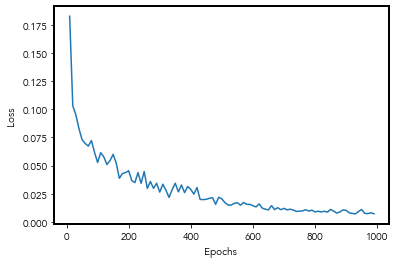

In [28]:
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer = 'adam', loss = tf.keras.losses.MSE)

#epics = []
#for item in range(0,1000,10):
#    epics.append(item)
    
loss = []
epochs = []
last_epochs = 0
for item in range(10,1000,10):
    epochs.append(item)
    loss.append(avg_loss(test_ds,test,val_ds,item-last_epochs))
    last_epochs = item
plt.plot(epochs,loss)
plt.xlabel('Epochs ')
plt.ylabel('Loss ')

In [29]:
model.fit(train_ds, epochs= 800, validation_data=val_ds)

Epoch 1/800
4/4 [==============================] - 0s 6ms/step - loss: 5.3176e-04 - val_loss: 1.0871e-04
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 5.1422e-04 - val_loss: 1.1893e-04
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 5.1187e-04 - val_loss: 1.1987e-04
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 6.6617e-04 - val_loss: 1.1199e-04
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 4.8344e-04 - val_loss: 1.1174e-04
Epoch 6/800
4/4 [==============================] - 0s 7ms/step - loss: 5.0362e-04 - val_loss: 1.1835e-04
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 5.7434e-04 - val_loss: 1.0892e-04
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 5.1499e-04 - val_loss: 1.1268e-04
Epoch 9/800
4/4 [==============================] - 0s 6ms/step - loss: 5.7100e-04 - val_loss: 9.8631e-05
Epoch 10/800
4/4 [==============================] - 0s 

In [30]:
true_values = list(test['Target'])
test_predictions = model.predict(test_ds)
#test_predictions = test_predictions.tolist()

1/1 [==============================] - 0s 6ms/step


Text(0.5, 1.0, 'Binary: Accuracy with all Atomic Properites')

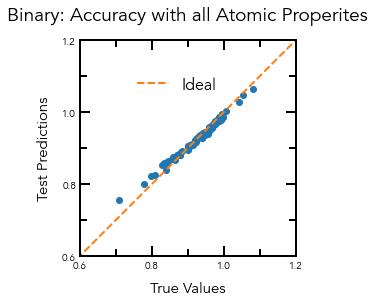

In [31]:
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0, 0, 1, 1])


ax.plot(true_values, test_predictions, 'o' )

ax.plot([i/10 for i in range(0,14)], [i/10 for i in range(0,14)], linewidth=2, label='Ideal', linestyle='dashed')



ax.set_xlim(.6, 1.2)
ax.set_ylim(.6, 1.2)



ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(.2))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))



ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlabel('True Values', labelpad=10,fontsize = 15)
ax.set_ylabel('Test Predictions', labelpad=10,fontsize = 15)

ax.legend(bbox_to_anchor=(.7, .9), loc=1, frameon=False, fontsize=16)

#plt.title('Accuracy with Density Input' ,fontsize = 19)

ax.set_title('Binary: Accuracy with all Atomic Properites', pad=20, fontsize = 19)





In [ ]:
#true_values_b = [0.9515147672611448, 0.8619160697324452, 0.9876793456982038, 0.9649530712412919, 0.9597260014768717, 1.064922789354152, 0.8532777396099585, 0.8898293325195794, 0.9636389019912588, 0.8975569007132539, 0.9872659305709622, 0.9685250460992347, 0.9688412263357805, 0.9747430218242296, 0.9326163445281415, 0.8833038381303667, 0.818572868399328, 0.9115617173573373, 0.9383143507489492, 0.9387792002462922, 0.9476149979291577, 0.7295569372719611, 0.9537957893060476, 0.9131457507023927, 1.1144565839241776, 0.8488947655015798, 0.9692880456357634, 0.997151823501964, 0.9389413061212153, 0.8613940282996246, 0.9735518249560708, 0.986910583677853, 0.8580291198826849, 1.013060446832674, 0.9681295827105894, 0.9705292932520045, 0.8318620466150488, 0.9716818312889153, 0.9544893406355848, 0.9685250460992347, 0.8742569455434276, 0.9586659033651407, 1.0362636989513698, 0.8864251167567604, 0.9264987503548224, 1.0059230964664572, 0.8930435512781771, 0.9119112161379435, 0.968206267844673, 0.9709431083586674, 0.9856656824567597, 0.9252445016943094, 0.9689396220852798, 0.9315988089263744, 0.9450989662775013, 0.9569823876951687, 0.9779589785713233, 0.9772804571570066, 0.8355330919074029, 0.9328308359194178, 0.9789571629181882, 0.9959474899890072, 0.9128618328637931, 0.789646763730196, 0.8735057676116866, 0.9675462737656046, 0.9954450040718698, 0.9721612197662035, 0.7799046024309041, 0.9328738889532544, 1.0819708913625952, 0.9166661994942711, 0.9059989635623857, 0.9309635590490668, 0.954523092861976, 0.9962407769017356, 0.9706588819676364, 0.9650432913804194, 0.9116825294386167, 0.9831340663136005, 0.9449601316548712, 0.9593926262430641, 0.926422051290347, 0.9265332486957226, 0.8787469492017881, 0.8777660068817122, 0.9751551205326505, 1.0079974815597506, 0.7838508196483013, 0.9401552422754418, 0.7774673991295751, 0.982634423747133, 0.8502136216585536, 1.028782763053749, 0.9236864243366458, 0.9310472352770192, 0.9869222390599498, 0.9752710539291353, 0.9803755356060313, 0.916757368223585, 0.9399572044123382, 0.9588573609840623, 0.8714764512781437, 0.9415326740466513, 1.0399545548507365, 0.8980782006484305]
#test_predictions_b = [[0.949914276599884], [0.8687153458595276], [0.9874340891838074], [0.9715436100959778], [0.960634708404541], [1.057200312614441], [0.8699917793273926], [0.8878993988037109], [0.9644967913627625], [0.9016296863555908], [0.9896317720413208], [0.9703616499900818], [0.9735358953475952], [0.9757888913154602], [0.93433678150177], [0.8812340497970581], [0.8236963152885437], [0.9161041378974915], [0.937698483467102], [0.9357441663742065], [0.9434279799461365], [0.7360701560974121], [0.9575222730636597], [0.9231483936309814], [1.1259897947311401], [0.8658068180084229], [0.9694409966468811], [0.9978075623512268], [0.9399236440658569], [0.8646438121795654], [0.9706605076789856], [0.9861921072006226], [0.8611419796943665], [1.0147820711135864], [0.9697260856628418], [0.9718409180641174], [0.844540536403656], [0.9685224294662476], [0.959928035736084], [0.9703616499900818], [0.8878017067909241], [0.9580298066139221], [1.0280632972717285], [0.8866205215454102], [0.9217491149902344], [1.0138291120529175], [0.8959020972251892], [0.9093271493911743], [0.9704293012619019], [0.9711498618125916], [0.9854369163513184], [0.924849271774292], [0.96707683801651], [0.9305799007415771], [0.944550633430481], [0.9532530903816223], [0.9788258075714111], [0.9827694892883301], [0.8555890917778015], [0.9351380467414856], [0.9825344681739807], [0.9957004189491272], [0.913929283618927], [0.7971060276031494], [0.8814554214477539], [0.9638774394989014], [1.0036852359771729], [0.9751741886138916], [0.7980356216430664], [0.9296138286590576], [1.0882781744003296], [0.917560875415802], [0.9098871946334839], [0.9422692656517029], [0.9578282833099365], [0.9940095543861389], [0.9734410643577576], [0.9610465168952942], [0.9149177074432373], [0.9737966060638428], [0.9427933692932129], [0.9536617398262024], [0.9270575046539307], [0.927161455154419], [0.8823935389518738], [0.8824154734611511], [0.9755504131317139], [1.0106858015060425], [0.7991381287574768], [0.9396481513977051], [0.8043670058250427], [0.9801948070526123], [0.862964928150177], [1.0293383598327637], [0.923162579536438], [0.9319306015968323], [0.992339015007019], [0.977357029914856], [0.9872024059295654], [0.9147204160690308], [0.9408616423606873], [0.9538493156433105], [0.8838366270065308], [0.9446678757667542], [1.0257920026779175], [0.9032852649688721]]